# 1st Assignment: Analyse your graph


Scopo di questa relazione è ricavare le caratteristiche generali del grafo rispondendo alle domande richieste da consegna, alcune della quali utili per lo svolgimento del 2nd assignment.

Abbiamo realizzato questo notebook per riutilizzare le funzioni scritte ed analizzare diversi grafi in maniera rapida. 

I grafi "sintetici" che andremo ad analizzare sono : 
<br>1- random graphs
<br>2- small world graphs
<br>3- scale-free networks

Il grafo reale da analizzare è stato realizzato custom: i nodi rappresentano tutti i ricercatori del DIBRIS registrati su Google Scholar, gli archi tra due nodi corrispondono ad una collaborazione in almeno una pubblicazione. Il grafo di conseguenza non è orientato.

Per ottenere il grafo siamo partiti dalla lista di membri del dipartimento: https://www.dibris.unige.it/afferenti
<br>Dopodiché abbiamo fatto scraping di Google Scholar attraverso lo script in python che si trova nella cartella git del progetto. Google non offre delle API, per cui ci siamo serviti di una libreria python `scholarly`, che presentava diversi bug i quali abbiamo fixato e inviato pull request su github.
<br>Per evitare i captcha di Google poche richiesta al minuto, impiegando circa due giorni per popolare il grafo.
<br>Dei 286 membri del dibris solo 104 hanno un account Scholar, per gli altri non è possibile recuperare informazioni in modo attendibile. 

## Parte 1: random graph
In questa sezione andiamo ad analizzare un Erdös–Rényi random graph generato tramite networkx

Utilizziamo un p relativamente grande: 0,02 per avere una giant component che comprenda almeno il 75% dei nodi.
<br>Per quanto riguarda il numero di nodi ci siamo fermati a 150 per prestazioni di calcolo e per visualizzare il grafo in questo notebook.

Ci aspettiamo che la degree media del grafo sia un valore compreso tra 2 e 3 (vedi slide), che il coefficiente di clustering sia basso.

In [1]:
import networkx
graph = networkx.gnp_random_graph(150, 0.02, seed=42)


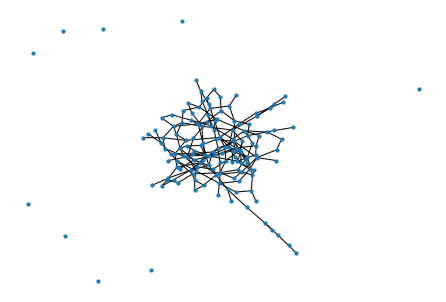

In [2]:
import matplotlib.pyplot as plt

networkx.draw(graph, with_labels=False, node_size=10)
plt.show()

In [3]:
print("Number of nodes: ", len(graph))
print("Number of edges: ", graph.number_of_edges())

Number of nodes:  150
Number of edges:  203


In [4]:
import collections

def average_degree(graph):
    """
    Calculate the average degree of the network
    :param graph: the networkx Graph() object
    :return: the average degree of the network
    """
    k = map(lambda d: d[1], graph.degree())
    return sum(list(k)) / graph.number_of_nodes()

print("Avarage degree: ", average_degree(graph))

Avarage degree:  2.7066666666666666


Text(0.5, 0, 'Degree')

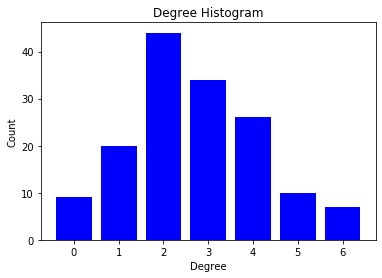

In [5]:
# Plot istrogramma degree

degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")



In [6]:
print("Density: ", networkx.density(graph))


Density:  0.018165548098434004


In [7]:
def connected_component_subgraphs(G):
    for c in networkx.connected_components(G):
        yield G.subgraph(c)

components = sorted(connected_component_subgraphs(graph), key=len, reverse=True)
print("There are ", len(components), " connected components")
print("Giant component size: ", len(components[0]))



There are  10  connected components
Giant component size:  141


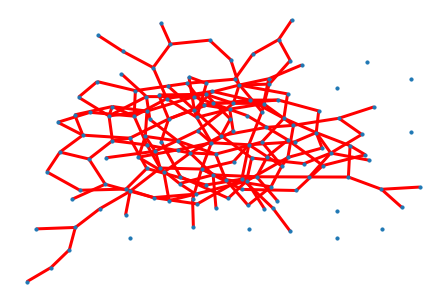

In [8]:
# Plot del grafo con le varie componenti connesse colorate con diversi colori
# identify largest connected component
import pydot
from networkx.drawing.nx_pydot import graphviz_layout



pos = graphviz_layout(graph)

networkx.draw(graph, pos, with_labels=False, node_size=10)
# Getting largest connected component
graphcc = sorted(networkx.connected_components(graph), key=len, reverse=True)
graph0 = graph.subgraph(graphcc[0])
networkx.draw_networkx_edges(graph0, pos,
                        with_labels=False,
                        edge_color='r',
                        width=3.0
                        )
# show other connected components
for Gi in graphcc[1:]:
    if len(Gi) > 1:
        networkx.draw_networkx_edges(graph.subgraph(Gi), pos,
                                with_labels=False,
                                edge_color='r',
                                alpha=0.3,
                                width=2.0
                                )



Nelle celle seguenti andiamo quindi a misurare la distanza massima (diametro), minima (raggio) e media tra due punti qualsiasi del grafo.  
<br>In realtà non è possibile trovare queste misure per tutto il grafo se non è completamente connesso perché il diametro e la media sarebbero uguali ad infinito. Ci riferiamo quindi solo alla giant component.

In [9]:
print("Maximum eccentricity of giant component: ", networkx.diameter(components[0])) 

Maximum eccentricity of giant component:  14


In [10]:
print("Minimun eccentricity of giant component: ", networkx.radius(components[0])) 

Minimun eccentricity of giant component:  7


In [11]:
print("Average shortes path: ", networkx.average_shortest_path_length(components[0]))

Average shortes path:  5.208915906788247


Adesso andiamo ad analizzare il clustering coefficient e la transitivity che ci da un'idea di quanto i nodi siano connessi tra di loro e la percentuale di cliques all'interno del grafo.

In [12]:
print("Average clustering coefficient: ", networkx.average_clustering(graph))

Average clustering coefficient:  0.015555555555555557


In [13]:
print("Transitivity: ", networkx.transitivity(graph))

Transitivity:  0.01775147928994083


### Considerazioni

Come visto durante le lezioni il random graph ha una distanza tra i nodi dipende dal log(N), nel nostro caso abbiamo notato come con un p pari a 0.02 la distanza media (shortest path) è bassa perché il numero di nodi è basso.

Inoltre come ci si poteva aspettare i valori di clustering coefficient e di transitivity sono molto bassi, non rispecchiando la natura vera delle reti reali

#### Nodi importanti

In questa sezione si andrà ad analizzare quale nodi sono più importanti di altri, in base a metriche descritte in precedenza.

Questi nodi saranno poi target di attacchi per il 2nd assignment.

In [14]:
print("10 nodi con degree maggiore")
dict(sorted(graph.degree, key=lambda x: x[1], reverse=True)[:10])

10 nodi con degree maggiore


{60: 6, 70: 6, 93: 6, 107: 6, 116: 6, 142: 6, 148: 6, 13: 5, 14: 5, 18: 5}

In [15]:
import operator

print("10 nodi con maggiore closeness")
dict(sorted(networkx.closeness_centrality(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])


10 nodi con maggiore closeness


{70: 0.23917022574740693,
 29: 0.23701553902896183,
 148: 0.23658925208826226,
 13: 0.2340633881869641,
 60: 0.2336476450463123,
 14: 0.22679935200185142,
 143: 0.22679935200185142,
 116: 0.2248608960018356,
 106: 0.2229552951882607,
 30: 0.22145391272908052}

In [16]:
print("10 nodi con maggiore betweenness")
dict(sorted(networkx.betweenness_centrality(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])


10 nodi con maggiore betweenness


{13: 0.14128553717479886,
 60: 0.11539737571616764,
 29: 0.10051825630684687,
 70: 0.0970219727770063,
 116: 0.09121653031049001,
 148: 0.085830470897585,
 4: 0.08498095410847088,
 107: 0.08392061336692207,
 97: 0.07835164437513428,
 81: 0.07633052297481831}

In [17]:
print("10 nodi con maggiore clustering coefficient")
dict(sorted(networkx.clustering(graph).items(), key=operator.itemgetter(1),reverse=True)[:10])


10 nodi con maggiore clustering coefficient


{111: 1.0,
 124: 0.3333333333333333,
 32: 0.16666666666666666,
 55: 0.16666666666666666,
 74: 0.16666666666666666,
 100: 0.16666666666666666,
 120: 0.16666666666666666,
 98: 0.1,
 148: 0.06666666666666667,
 0: 0}